In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.datasets import get_rdataset

In [3]:
data = get_rdataset('AirPassengers').data
data.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
seq_len = 12
mean,std = data.value.mean(),data.value.std()
vals_norm = (data.value - mean)/std


In [5]:
X,y= [],[]
for i  in range(len(vals_norm)-seq_len):
  X.append(vals_norm.iloc[i:i+seq_len])
  y.append(vals_norm.iloc[i+seq_len])


In [6]:
X = np.array(X)
y = np.array(y)
X.shape,y.shape

((132, 12), (132,))

In [7]:
X = np.array(X).reshape(-1,seq_len,1)
y = np.array(y).reshape(-1,1)

In [8]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64,activation = 'tanh',input_shape = (seq_len,1)),
    tf.keras.layers.Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3,clipnorm=1.0),
              loss = 'mean_squared_error')



In [10]:
len1 = int(0.8*(len(X)))
X_train = X[:len1]
X_test = X[len1:]
len2 = int(0.8*(len(y)))
y_train = y[:len2]
y_test = y[len2:]

In [11]:
history = model.fit(X_train,y_train,epochs = 50,batch_size = 16,verbose = 1,validation_data=(X_test,y_test))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - loss: 0.2531 - val_loss: 0.6759
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1114 - val_loss: 0.3763
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0510 - val_loss: 0.3113
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0351 - val_loss: 0.3396
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0284 - val_loss: 0.2634
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0325 - val_loss: 0.3325
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0216 - val_loss: 0.2280
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200 - val_loss: 0.3025
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0153 - val_loss: 0.2502
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0201 - val_loss: 0.2339
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0144 - val_loss: 0.2571
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0130 - val_loss: 0.2352
E

In [12]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
mse = mean_squared_error(y_test,y_pred)
mse
mae = mean_absolute_error(y_test,y_pred)
mae

r2 = r2_score(y_test,y_pred)
r2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


0.5292931313949677

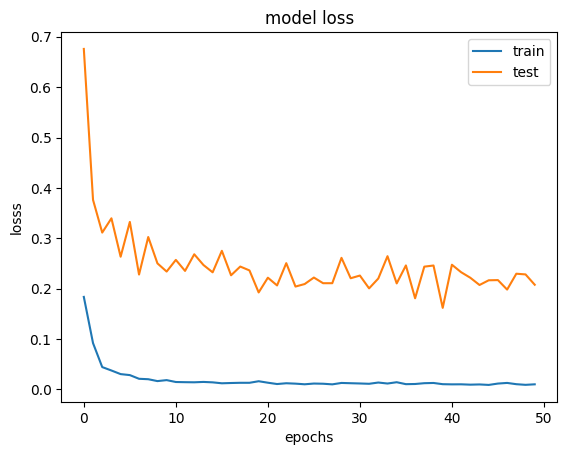

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label = "train")
plt.plot(history.history['val_loss'],label = "test")
plt.xlabel("epochs")
plt.ylabel('losss')
plt.title("model loss")
plt.legend()
plt.show()

